In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/age-detection-human-faces-18-60-years/age_detection.csv
/kaggle/input/age-detection-human-faces-18-60-years/test/51-60/29.jpg
/kaggle/input/age-detection-human-faces-18-60-years/test/51-60/28.jpg
/kaggle/input/age-detection-human-faces-18-60-years/test/51-60/26.jpg
/kaggle/input/age-detection-human-faces-18-60-years/test/51-60/27.jpg
/kaggle/input/age-detection-human-faces-18-60-years/test/51-60/25.jpg
/kaggle/input/age-detection-human-faces-18-60-years/test/31-40/29.jpg
/kaggle/input/age-detection-human-faces-18-60-years/test/31-40/28.jpg
/kaggle/input/age-detection-human-faces-18-60-years/test/31-40/26.jpg
/kaggle/input/age-detection-human-faces-18-60-years/test/31-40/27.jpg
/kaggle/input/age-detection-human-faces-18-60-years/test/31-40/25.jpg
/kaggle/input/age-detection-human-faces-18-60-years/test/21-30/29.jpg
/kaggle/input/age-detection-human-faces-18-60-years/test/21-30/28.jpg
/kaggle/input/age-detection-human-faces-18-60-years/test/21-30/26.jpg
/kaggle/input/age-de

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import os
from tqdm import tqdm

In [4]:
df = pd.read_csv('/kaggle/input/age-detection-human-faces-18-60-years/age_detection.csv')
df.head()

,file,age,split
0,train/18-20/0.jpg,18-20,train
1,train/18-20/1.jpg,18-20,train
2,train/18-20/2.jpg,18-20,train
3,train/18-20/3.jpg,18-20,train
4,train/18-20/4.jpg,18-20,train


In [5]:
df.columns

Index(['file', 'age', 'split'], dtype='object')

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   file    150 non-null    object
 1   age     150 non-null    object
 2   split   150 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB
None


In [7]:
def age_to_num(age_str):
    if isinstance(age_str, str) and '-' in age_str:
        low, high = age_str.split('-')
        return (int(low) + int(high)) / 2
    return float(age_str)

df['age'] = df['age'].apply(age_to_num)

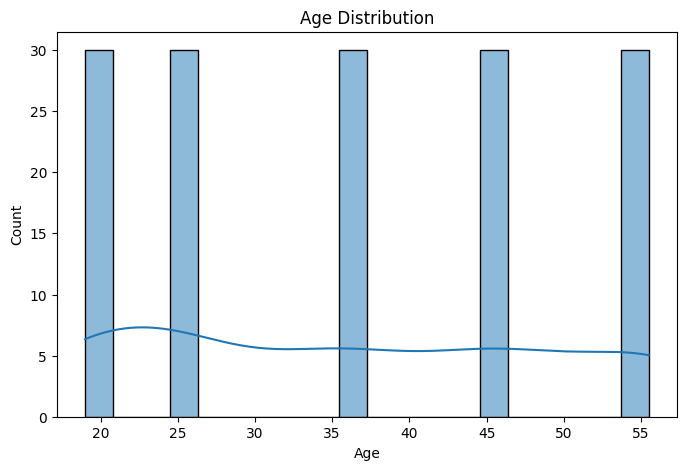

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

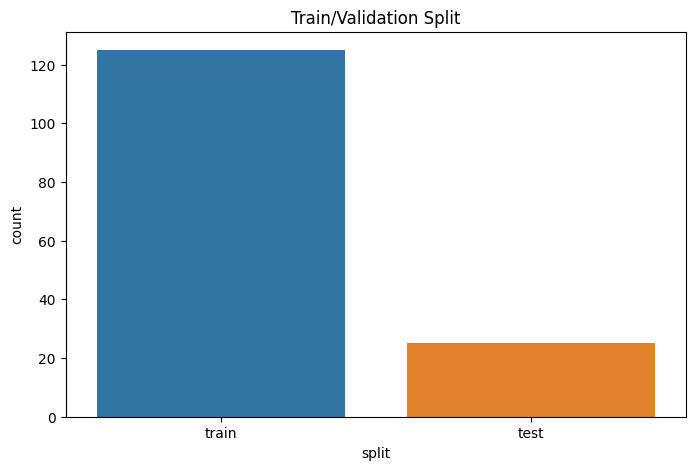

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x='split', data=df)
plt.title("Train/Validation Split")
plt.show()

In [10]:
images, ages = [], []
for idx, row in tqdm(df.iterrows(), total=len(df)):
    img_path = '/kaggle/input/age-detection-human-faces-18-60-years/' + row['file']
    if os.path.exists(img_path):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64,64))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img.flatten())
        ages.append(row['age'])

100%|██████████| 150/150 [00:18<00:00,  7.91it/s]


In [11]:
X = np.array(images)
y = np.array(ages)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")
print("Best Model: RandomForestRegressor")


Mean Squared Error: 211.61
R2 Score: -0.17
Best Model: RandomForestRegressor


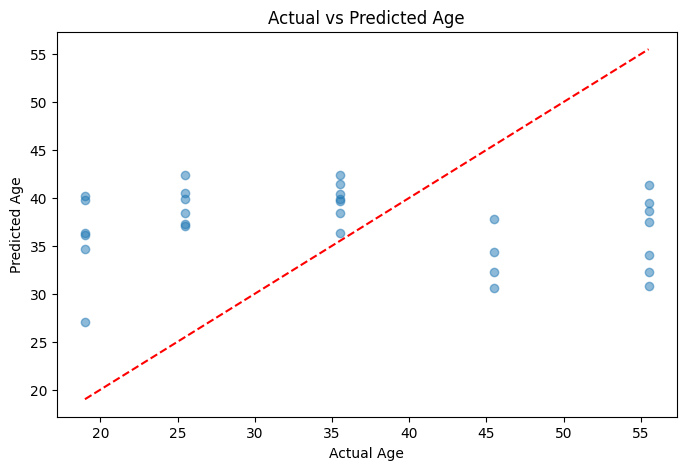

In [15]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs Predicted Age")
plt.show()